In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/panda_bear'

In [ ]:
# CREATING tf.data IMAGE DIRECTORY
tf_df = tf.keras.preprocessing.image_dataset_from_directory(\
                                                           path,
                                                           shuffle = True,
                                                           image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                           batch_size = BATCH_SIZE)

Found 600 files belonging to 2 classes.


In [ ]:
# PRINTING THE CLASS LABELS
class_names = tf_df.class_names
class_names

['Bears', 'Pandas']

In [ ]:
DF_LEN = len(tf_df)
DF_LEN

19

In [ ]:
# printing the shape of the image
# printing the label batch
for image,label in tf_df.take(1):
    print(image.shape)
    print(label.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0]


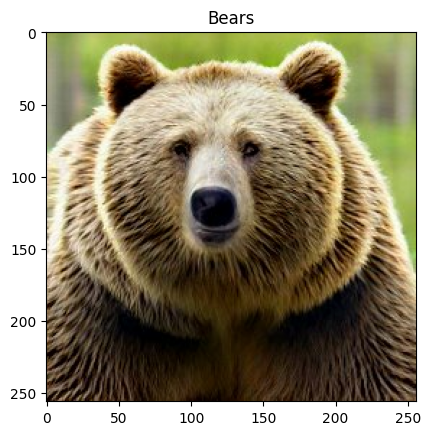

In [ ]:
for image,label in tf_df.take(1):
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label[0]])

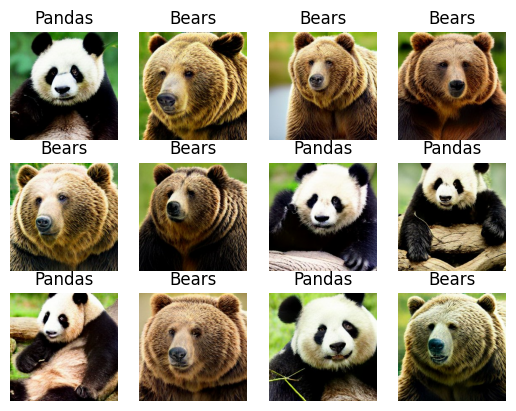

In [ ]:
for image,label in tf_df.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [ ]:
# train test split
# 75 for training
# 25 for testing

In [ ]:
def train_test(df,train_split,test_split,shuffle=True,shuffle_size=30):

  if shuffle :
    df = df.shuffle(buffer_size=shuffle_size,seed=41)

  df_len = len(df)

  train_size = round(df_len * train_split)
  test_size = round(df_len * test_split)

  train = df.take(train_size)
  test = df.skip(train_size).take(test_size)

  return train,test

In [ ]:
train_df, test_df = train_test(tf_df,0.75,0.25)

In [ ]:
len(train_df),len(test_df)

(14, 5)

In [ ]:
train_df = train_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(50).prefetch(buffer_size= tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2


model = models.Sequential([

    layers.Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'sigmoid')
])


In [ ]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_df,epochs=100,
                    batch_size = BATCH_SIZE,
                    verbose=1,
                    validation_data=test_df
               )

Epoch 1/100
14/14 [==============================] - 3s 105ms/step - loss: 4318.6367 - accuracy: 0.6636 - val_loss: 30.5643 - val_accuracy: 0.9875
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 267.7198 - accuracy: 0.9636 - val_loss: 98.5294 - val_accuracy: 0.9812
Epoch 3/100
14/14 [==============================] - 0s 15ms/step - loss: 103.1371 - accuracy: 0.9795 - val_loss: 25.9384 - val_accuracy: 0.9937
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 88.9000 - accuracy: 0.9818 - val_loss: 11.7244 - val_accuracy: 0.9937
Epoch 5/100
14/14 [==============================] - 0s 15ms/step - loss: 49.2625 - accuracy: 0.9932 - val_loss: 31.2329 - val_accuracy: 0.9937
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 29.2752 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 2.2161 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val

Run different single layer Neural Network models with image sizes as 500x500, 100x100, 50x50, 25x25, 10x10 (use OpenCV for resizing within code i.e. do not use MS Paint)

In [ ]:
total = [500,100,50,25,10]

In [ ]:
size_1 = 500
size_2 = 100
size_3 = 50
size_4 = 25
size_5 = 10

In [ ]:
resize =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(size_1,size_1),

])

In [ ]:
model1 = models.Sequential([
    resize,
    layers.Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'sigmoid')
])


In [ ]:
model1.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_df,epochs=100,
                    batch_size = BATCH_SIZE,
                    verbose=1,
                    validation_data=test_df
               )

In [ ]:
resize =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(size_2,size_2),

])

model2 = models.Sequential([
    resize,
    layers.Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'sigmoid')
])

model2.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

history3 = model2.fit(train_df,epochs=100,
                    batch_size = BATCH_SIZE,
                    verbose=1,
                    validation_data=test_df
               )

In [ ]:
resize =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(size_3,size_3),

])

model3 = models.Sequential([
    resize,
    layers.Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'sigmoid')
])

model3.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

history3 = model3.fit(train_df,epochs=100,
                    batch_size = BATCH_SIZE,
                    verbose=1,
                    validation_data=test_df
               )

In [ ]:
resize =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(size_4,size_4),

])

model4 = models.Sequential([
    resize,
    layers.Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'sigmoid')
])

model4.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

history4 = model4.fit(train_df,epochs=100,
                    batch_size = BATCH_SIZE,
                    verbose=1,
                    validation_data=test_df
               )